<a href="https://colab.research.google.com/github/Zendellll/Road2_AI_Course/blob/main/AICourse_task9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting drive and creating a test set

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/drone_yolo_data/* /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds

In [ ]:
!mkdir /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/test
!mkdir /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/test/images
!mkdir /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/test/labels

!cp /content/drive/MyDrive/drone_data/*.jpg /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/test/images
!cp /content/drive/MyDrive/drone_data/*.txt /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/test/labels

# Training YoloV8 on the drones dataset

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 4.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load pretrained YoloV8 model
model = YOLO('yolov8n.pt')

epochs = 10 # Adjust as needed

# Train the model on quadcopter data
model.train(data='/content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/data.yaml', epochs=epochs)

100%|██████████| 6.23M/6.23M [00:00<00:00, 78.6MB/s]


Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/data.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 23.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/train/labels.cache... 3256 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3256/3256 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/val/labels.cache... 814 images, 0 backgrounds, 0 corrupt: 100%|██████████| 814/814 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.39G       1.84      3.286      1.204          8        640: 100%|██████████| 204/204 [01:59<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:22<00:00,  5.48s/it]


                   all        814        868      0.837      0.767      0.843      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.26G      1.784      1.613      1.214          8        640: 100%|██████████| 204/204 [01:53<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.53it/s]


                   all        814        868      0.844      0.788      0.864      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.27G      1.716      1.234      1.204          8        640: 100%|██████████| 204/204 [01:52<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]

                   all        814        868      0.881      0.587       0.73      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.26G      1.685      1.078      1.187         10        640: 100%|██████████| 204/204 [01:53<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.48it/s]

                   all        814        868      0.904      0.843      0.909      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.26G      1.659     0.9774      1.174          9        640: 100%|██████████| 204/204 [01:52<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.42it/s]

                   all        814        868      0.887      0.828      0.855      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.26G      1.645     0.9345      1.148          8        640: 100%|██████████| 204/204 [01:52<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]

                   all        814        868      0.871      0.849      0.864      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.26G      1.581     0.8717      1.132          8        640: 100%|██████████| 204/204 [01:55<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.54it/s]

                   all        814        868      0.897      0.832      0.894       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.26G      1.548     0.8051      1.124          9        640: 100%|██████████| 204/204 [01:54<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.55it/s]

                   all        814        868      0.938      0.883      0.921      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.26G      1.537     0.7875       1.11          9        640: 100%|██████████| 204/204 [01:53<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.52it/s]

                   all        814        868      0.948      0.911      0.952      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.26G       1.48     0.7404      1.087          9        640: 100%|██████████| 204/204 [01:52<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.48it/s]

                   all        814        868      0.953      0.914      0.952       0.53



10 epochs completed in 0.406 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.42it/s]


                   all        814        868      0.953      0.914      0.952      0.531
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f83a1f2b460>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## Save the model in ONNX format

In [ ]:
model.export(format='onnx', dynamic=True)

Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.9 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 66.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 15.7s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 17.6s, saved as 'runs/detect/train/weights/best.onnx' (11.5 MB)

Export complete (19.3s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/det

'runs/detect/train/weights/best.onnx'

In [ ]:
# !mkdir /content/drive/MyDrive/Learning/Road2_AI_Course/task9_runs
!cp -r /content/runs/detect/train_10 /content/drive/MyDrive/Learning/Road2_AI_Course/task9_runs/

# Make test sample

In [ ]:
!rm /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/test_sample/images/*.jpg
!rm /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/test_sample/labels/*.txt

In [ ]:
!mkdir /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/test_sample
!mkdir /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/test_sample/images
!mkdir /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/test_sample/labels

In [ ]:
import os

test_im_sample = os.listdir('/content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/test/images')[0:800:32]
test_lb_sample = os.listdir('/content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/test/labels')[0:800:32]
print(test_im_sample)
print(test_lb_sample)

['video16_489.jpg', 'video16_562.jpg', 'video17_102.jpg', 'video17_122.jpg', 'video17_418.jpg', 'video17_837.jpg', 'video17_995.jpg', 'video18_1082.jpg', 'video18_1132.jpg', 'video18_1232.jpg', 'video18_1286.jpg', 'video18_1352.jpg', 'video18_1417.jpg', 'video18_1474.jpg', 'video18_1523.jpg', 'video18_1595.jpg', 'video18_1649.jpg', 'video18_1708.jpg', 'video18_1771.jpg', 'video18_1826.jpg', 'video18_1888.jpg', 'video18_1943.jpg', 'video18_2012.jpg', 'video18_2084.jpg', 'video18_2150.jpg']
['video16_489.txt', 'video16_562.txt', 'video17_102.txt', 'video17_122.txt', 'video17_418.txt', 'video17_837.txt', 'video17_995.txt', 'video18_1082.txt', 'video18_1132.txt', 'video18_1232.txt', 'video18_1286.txt', 'video18_1352.txt', 'video18_1417.txt', 'video18_1474.txt', 'video18_1523.txt', 'video18_1595.txt', 'video18_1649.txt', 'video18_1708.txt', 'video18_1771.txt', 'video18_1826.txt', 'video18_1888.txt', 'video18_1943.txt', 'video18_2012.txt', 'video18_2084.txt', 'video18_2150.txt']


In [ ]:
im_path = '/content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/test/images'
lb_path = '/content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/test/labels'

zipped_sample = zip(test_im_sample, test_lb_sample)

for image, label in zipped_sample:
  !cp {im_path}/{image} /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/test_sample/images
  !cp {lb_path}/{label} /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/test_sample/labels

## Make sure images and labels are matching in the test sample

In [ ]:
for im, lb in zipped_sample:
  if not im.split('.')[0] == lb.split('.')[0]:
    print('omg')
print('we good')

we good


# Load previously trained model

In [ ]:
from ultralytics import YOLO

# Choose model version - either train_3,10,20,30.
# The number represents epoch num during training.
model_version = 'train_30'

model = YOLO(f'/content/drive/MyDrive/Learning/Road2_AI_Course/task9_runs/{model_version}/weights/best.pt')

# Run predictions on a sample of 25 images


0: 384x640 1 quadcopter, 192.4ms
Speed: 2.4ms preprocess, 192.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 quadcopter, 189.2ms
Speed: 2.8ms preprocess, 189.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 quadcopter, 179.8ms
Speed: 2.7ms preprocess, 179.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 quadcopter, 179.3ms
Speed: 2.7ms preprocess, 179.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 quadcopter, 188.2ms
Speed: 2.8ms preprocess, 188.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 quadcopter, 188.2ms
Speed: 2.9ms preprocess, 188.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 quadcopter, 190.8ms
Speed: 2.6ms preprocess, 190.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 quadcopter, 197.8ms
Speed: 2.6ms preprocess, 197.8ms inference

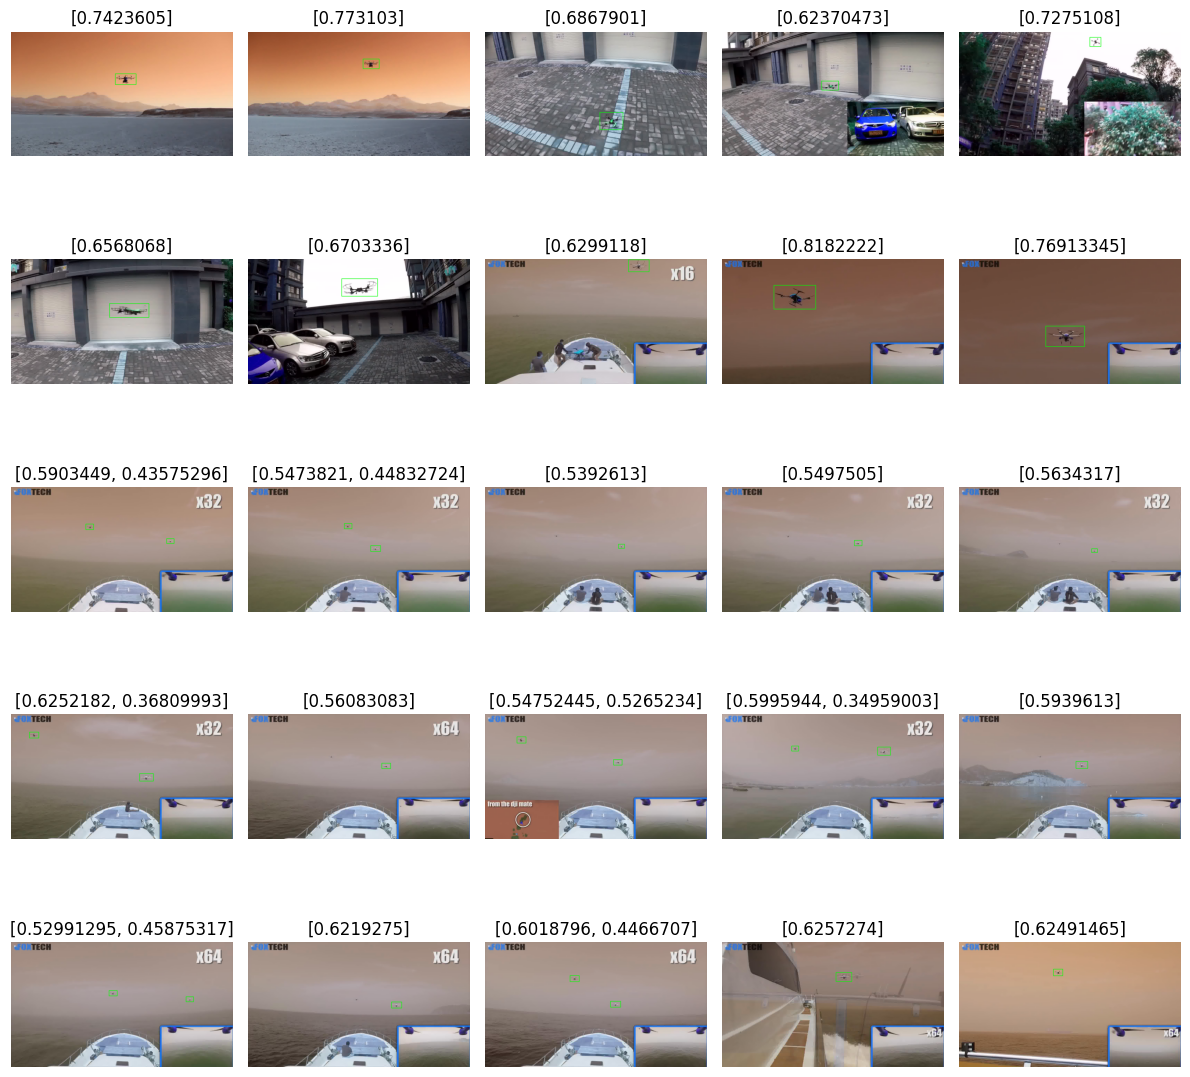

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2

# Define the path to the test images
test_images_path = "/content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/test_sample/images"

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(test_images_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Set up the plot grid
num_rows, num_cols = 5, 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Iterate through the images and make predictions
for i, image_file in enumerate(image_files):
    # Load the image using PIL (needed for inference)
    image_path = os.path.join(test_images_path, image_file)
    image = Image.open(image_path)

    # Make predictions using the model
    prediction = model(image)

    # Get xy coordinates for bbox
    xyxy = []
    conf = []
    for result in prediction:
      boxes = result.boxes.cpu().numpy()
      xyxys = boxes.xyxy
      probs = boxes.conf
      for c in probs:
        conf.append(c)

    # Load the image using cv2 (needed for drawing rectangle)
    image = cv2.imread(image_path)

    # Draw rectangle
    for xyxy in xyxys:
        image = cv2.rectangle(image, (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3])), (0, 255, 0), 2)

    # Plot the image and prediction in the grid
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(image)
    ax.axis("off")
    ax.set_title(f'{conf}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

# Model validation

In [13]:
def extract_metrics(metrics):
    m_list = {
        'precision': metrics.box.p[0],
        'recall': metrics.box.r[0],
        'map': metrics.box.map,
        'map@50': metrics.box.map50,
        'f1': metrics.box.f1[0]
    }
    return list(m_list.keys()), list(m_list.values())

Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/val/labels.cache... 814 images, 0 backgrounds, 0 corrupt: 100%|██████████| 814/814 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:20<00:00,  2.44it/s]


                   all        814        868      0.931      0.907      0.943      0.497
Speed: 0.4ms preprocess, 3.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val24


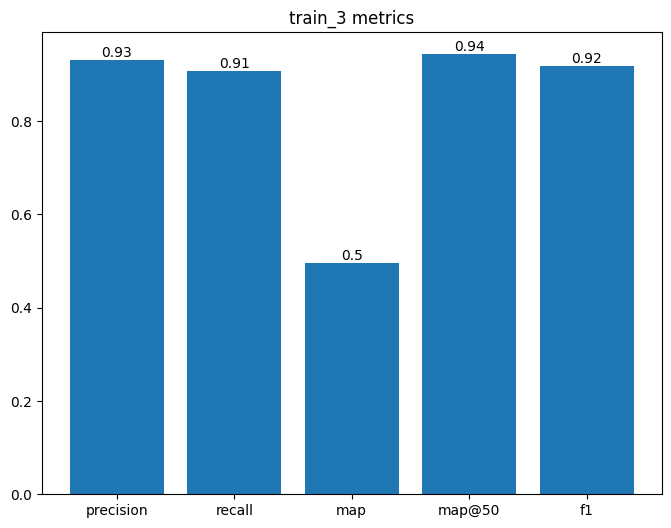

Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/val/labels.cache... 814 images, 0 backgrounds, 0 corrupt: 100%|██████████| 814/814 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:20<00:00,  2.43it/s]


                   all        814        868      0.951      0.912      0.951      0.528
Speed: 0.3ms preprocess, 3.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val25


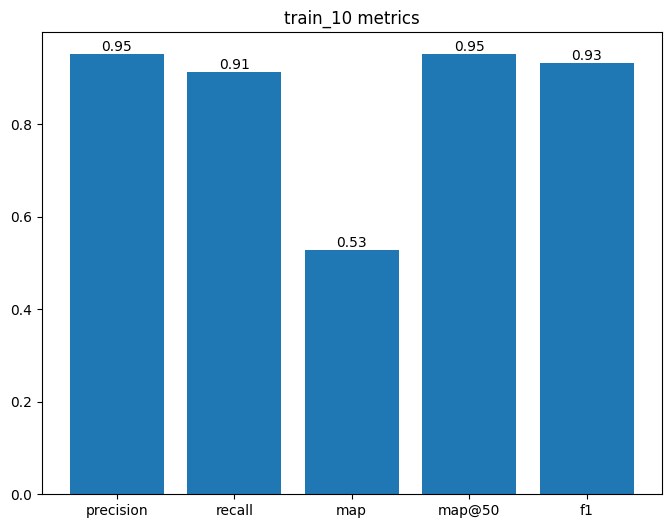

Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/val/labels.cache... 814 images, 0 backgrounds, 0 corrupt: 100%|██████████| 814/814 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:23<00:00,  2.14it/s]


                   all        814        868      0.954      0.961      0.978      0.592
Speed: 0.5ms preprocess, 2.9ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val26


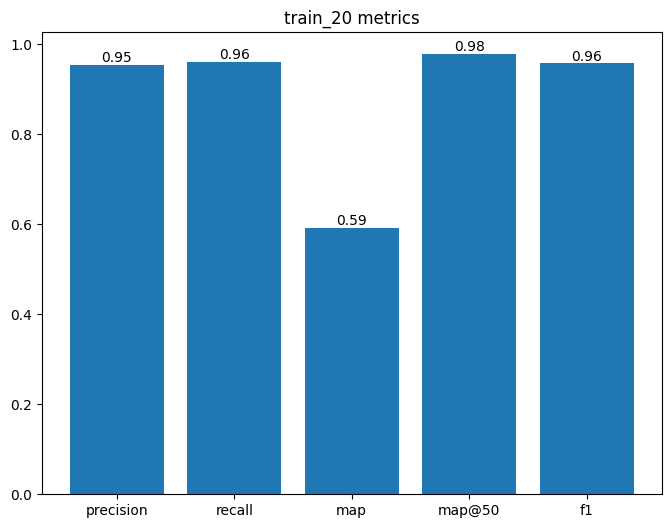

Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/val/labels.cache... 814 images, 0 backgrounds, 0 corrupt: 100%|██████████| 814/814 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:21<00:00,  2.42it/s]


                   all        814        868      0.953      0.961      0.976      0.595
Speed: 0.4ms preprocess, 3.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val27


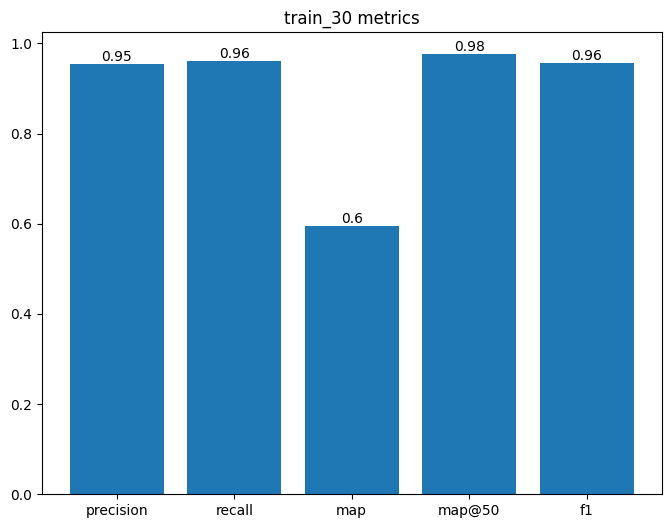

In [16]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import contextlib
import io

num_cols = 2
fig, axes = plt.subplots(num_cols, num_cols, figsize=(12, 12))

model_names = ['train_3', 'train_10', 'train_20', 'train_30']
for i, model_name in enumerate(model_names):

    # Load the model version
    model=YOLO(f'/content/drive/MyDrive/Learning/Road2_AI_Course/task9_runs/{model_name}/weights/best.pt')

    # Run validation and extract metrics
    metrics = model.val(data='/content/drive/MyDrive/Learning/Road2_AI_Course/task9_ds/data.yaml')
    keys, values = extract_metrics(metrics)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(keys, values)
    ax.set_title(f'{model_name} metrics')

    # Display exact values on each bar
    for bar, value in zip(bars, values):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(value, 2), ha='center', va='bottom')

    plt.show()